In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [141]:
df_bb=pd.read_csv('baseball.csv')
df_bb=pd.DataFrame(df_bb)
df_bb.head()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,StrkeOuts,StolenBases,RunsAllowed,EarnedRuns,ERA,CG,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


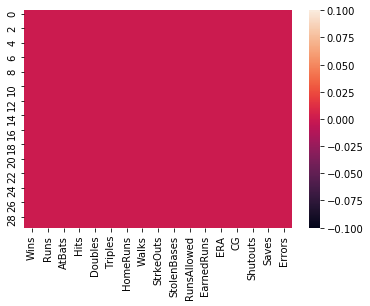

In [142]:
#checking for any missing data
sns.heatmap(df_bb.isnull())

In [143]:
df_bb.isnull().sum()

Wins           0
Runs           0
AtBats         0
Hits           0
Doubles        0
Triples        0
HomeRuns       0
Walks          0
StrkeOuts      0
StolenBases    0
RunsAllowed    0
EarnedRuns     0
ERA            0
CG             0
Shutouts       0
Saves          0
Errors         0
dtype: int64

In [144]:
#We can see there are no missing values in the dataset

In [145]:
#checking data types
df_bb.dtypes
#We can see all the data is in numerical form and there is no categorical form
#So this is most probably a regression problem

Wins             int64
Runs             int64
AtBats           int64
Hits             int64
Doubles          int64
Triples          int64
HomeRuns         int64
Walks            int64
StrkeOuts        int64
StolenBases      int64
RunsAllowed      int64
EarnedRuns       int64
ERA            float64
CG               int64
Shutouts         int64
Saves            int64
Errors           int64
dtype: object

In [146]:
#checking the basic info about the attributes and their counts
df_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Wins         30 non-null     int64  
 1   Runs         30 non-null     int64  
 2   AtBats       30 non-null     int64  
 3   Hits         30 non-null     int64  
 4   Doubles      30 non-null     int64  
 5   Triples      30 non-null     int64  
 6   HomeRuns     30 non-null     int64  
 7   Walks        30 non-null     int64  
 8   StrkeOuts    30 non-null     int64  
 9   StolenBases  30 non-null     int64  
 10  RunsAllowed  30 non-null     int64  
 11  EarnedRuns   30 non-null     int64  
 12  ERA          30 non-null     float64
 13  CG           30 non-null     int64  
 14  Shutouts     30 non-null     int64  
 15  Saves        30 non-null     int64  
 16  Errors       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [147]:
#checking the maximum and minimum values of each attribute and their percentiles
df_bb.describe()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,StrkeOuts,StolenBases,RunsAllowed,EarnedRuns,ERA,CG,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Univariate Analysis

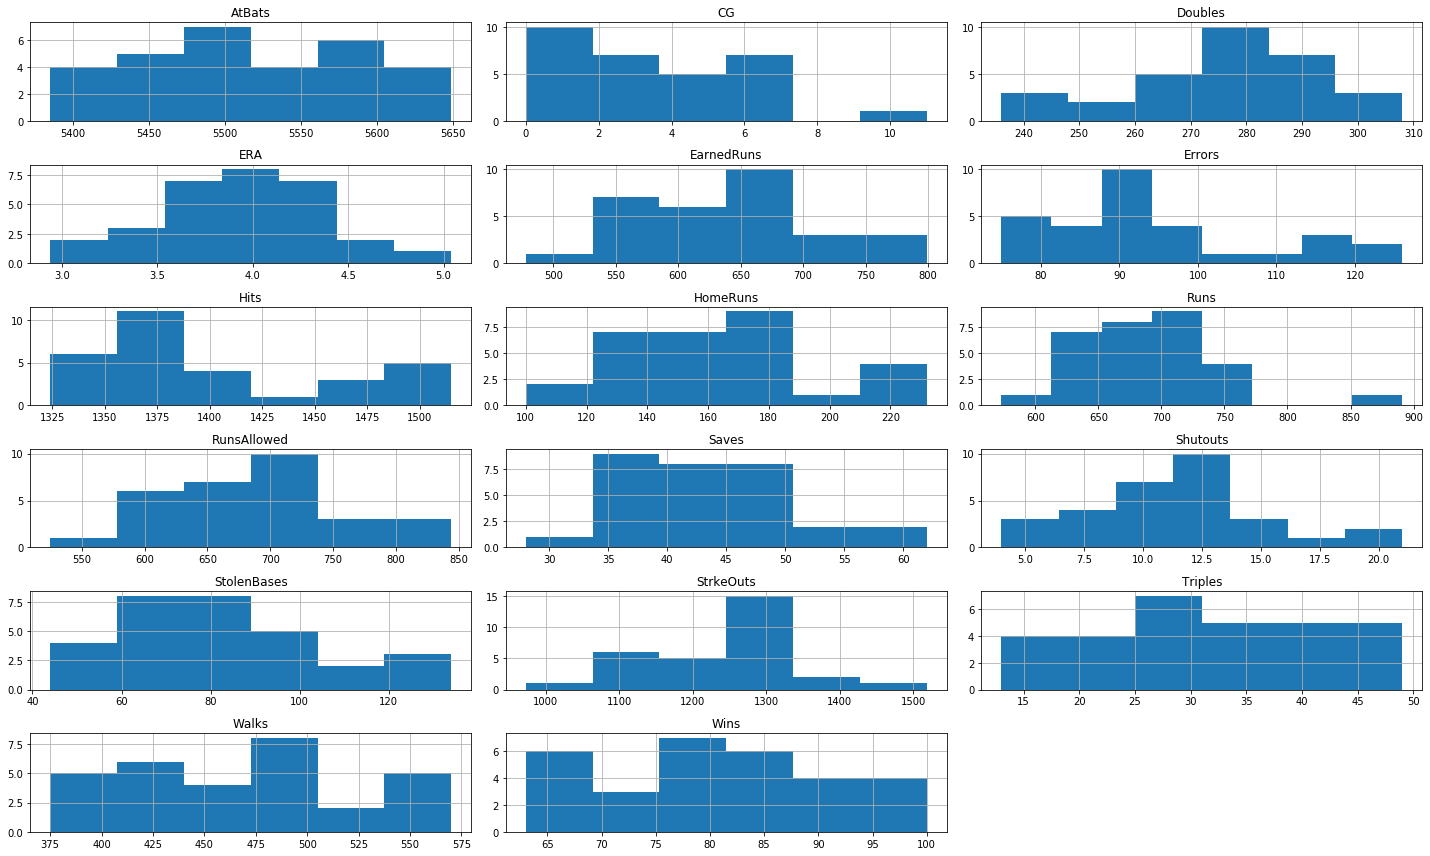

In [148]:
df_bb.hist(figsize = (20,12), layout=(6, 3), bins = 'auto')
plt.tight_layout()
plt.show()

In [149]:
#ERA data is in normal distribution 
#Runs and Shutouts shows signs of skewness
#Other attributes seems to have the data normally distributed

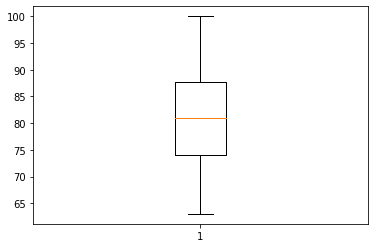

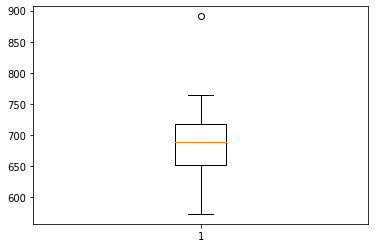

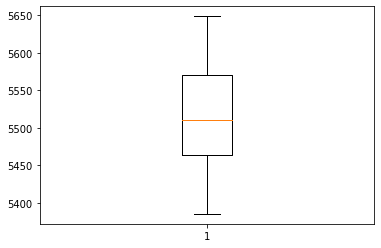

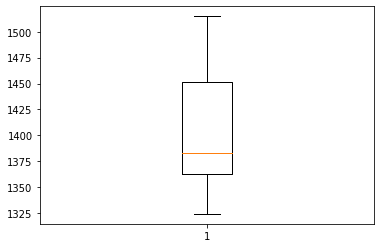

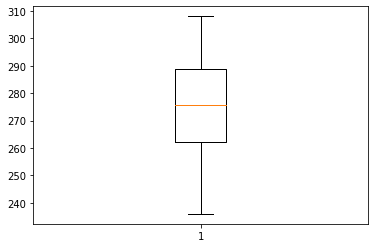

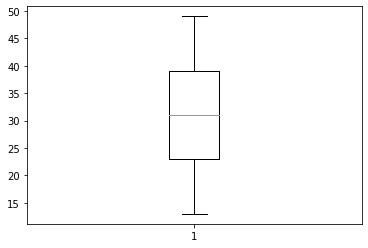

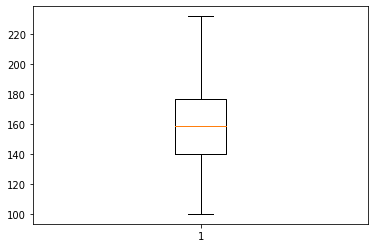

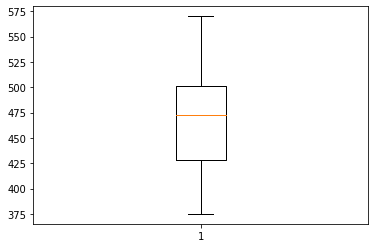

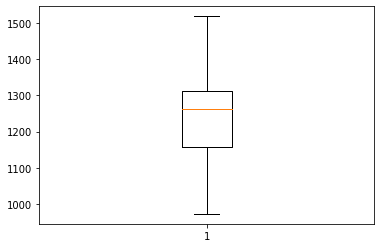

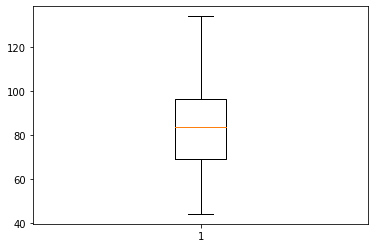

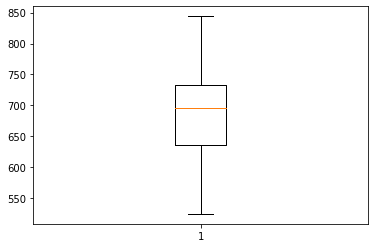

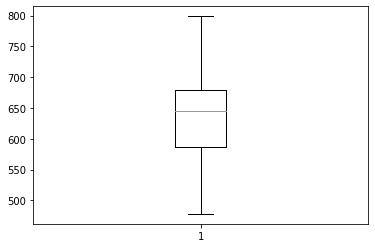

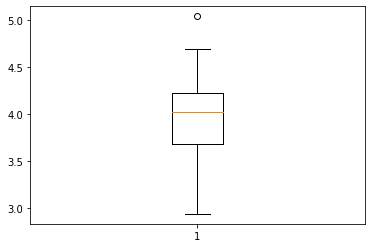

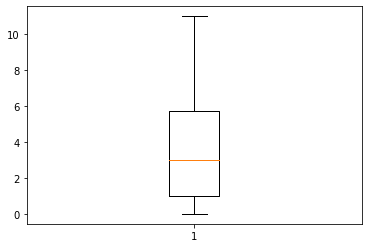

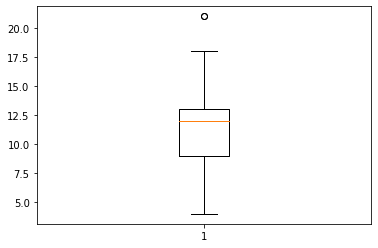

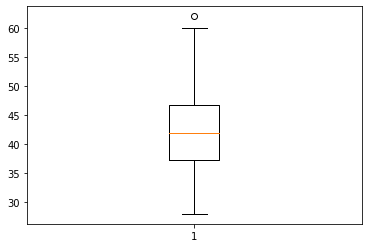

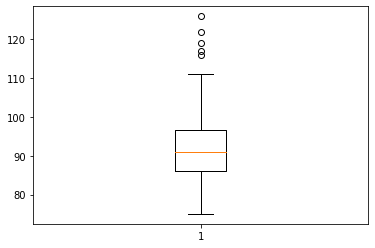

In [150]:
for i in df_bb:
    plt.boxplot(df_bb[i])
    plt.show()

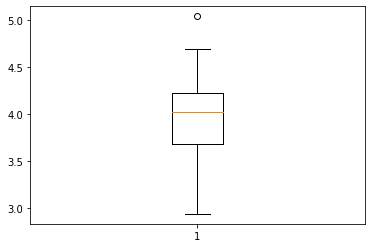

In [151]:
plt.boxplot(df_bb["ERA"])
plt.show()

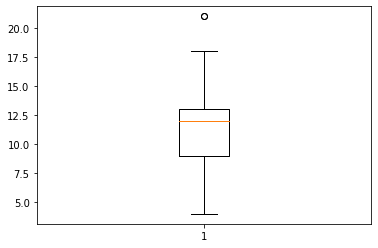

In [152]:
plt.boxplot(df_bb["Shutouts"])
plt.show()

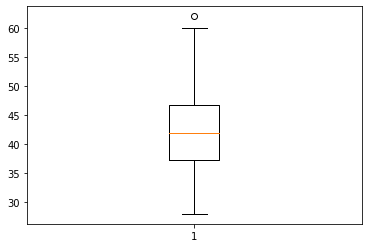

In [153]:
plt.boxplot(df_bb["Saves"])
plt.show()

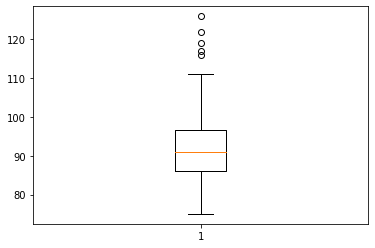

In [154]:
plt.boxplot(df_bb["Errors"])
plt.show()

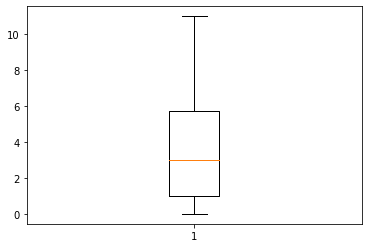

In [155]:
plt.boxplot(df_bb["CG"])
plt.show()

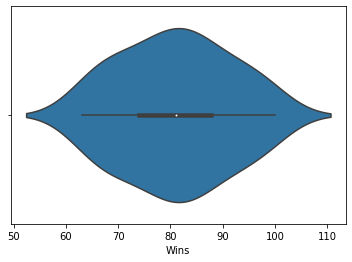

In [156]:
sns.violinplot(x='Wins',data=df_bb)
#most of the data is concentrated in the range 70 to 90

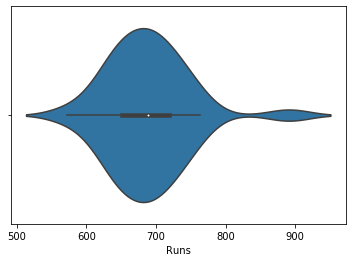

In [157]:
sns.violinplot(x='Runs',data=df_bb)
#most of the data is concentrated in the range 650 to 750

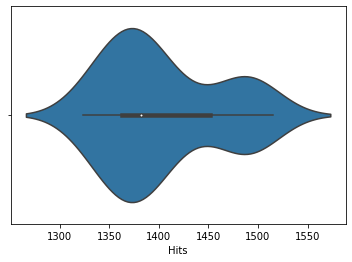

In [158]:
sns.violinplot(x='Hits',data=df_bb)
#most of the data is concentrated in the range 1350 to 1450

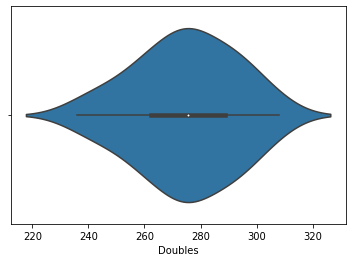

In [159]:
sns.violinplot(x='Doubles',data=df_bb)
#most of the data is concentrated in the range 260 to 300

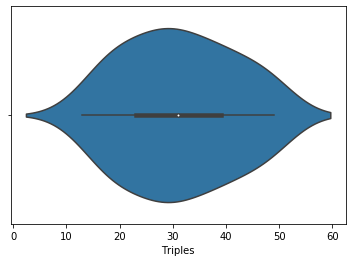

In [160]:
sns.violinplot(x='Triples',data=df_bb)
#most of the data is concentrated in the range 20 to 40

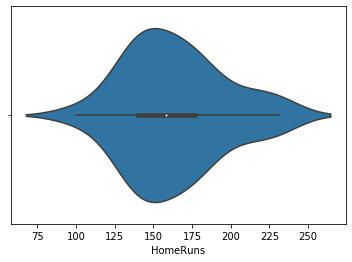

In [161]:
sns.violinplot(x='HomeRuns',data=df_bb)
#most of the data is concentrated in the range 125 to 175

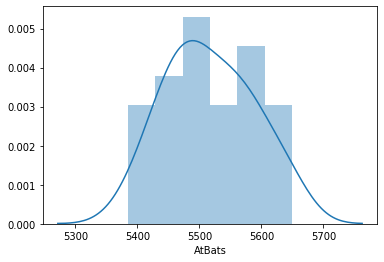

In [162]:
#Checking for the distribution of the data
sns.distplot(df_bb['AtBats'],bins='auto')
#normally distributed data

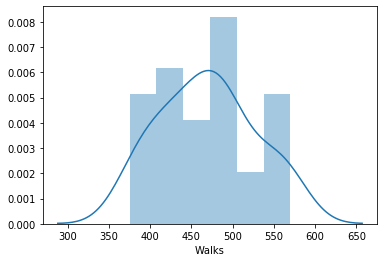

In [163]:
sns.distplot(df_bb['Walks'],bins='auto')
#normally distributed data

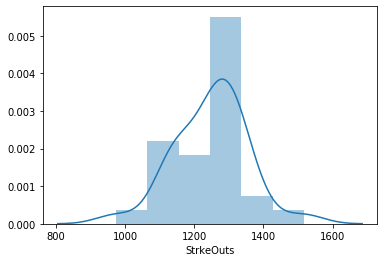

In [164]:
sns.distplot(df_bb['StrkeOuts'],bins='auto')
#slightly right skewed data

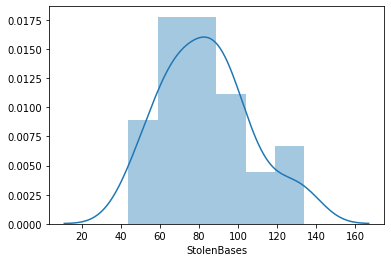

In [165]:
sns.distplot(df_bb['StolenBases'],bins='auto')
#normally distributed data

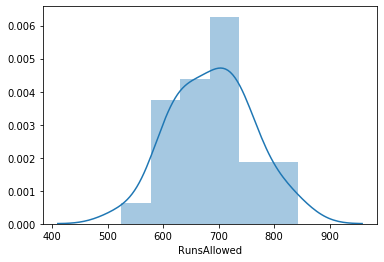

In [166]:
sns.distplot(df_bb['RunsAllowed'],bins='auto')
#normally distributed data

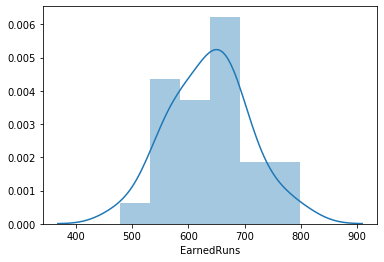

In [167]:
sns.distplot(df_bb['EarnedRuns'],bins='auto')
#normally distributed data

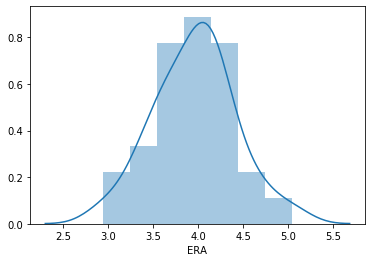

In [168]:
sns.distplot(df_bb['ERA'],bins='auto')
#normally distributed data

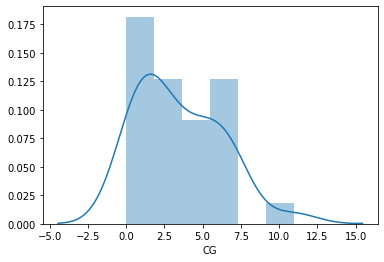

In [169]:
sns.distplot(df_bb['CG'],bins='auto')
#left skewed data

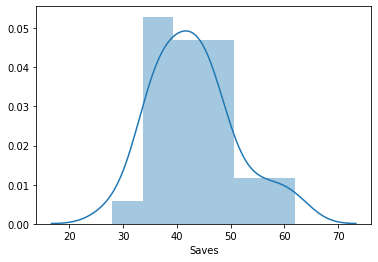

In [170]:
sns.distplot(df_bb['Saves'],bins='auto')
#normally distributed data

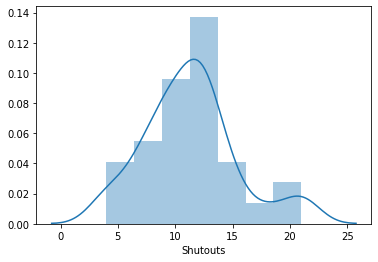

In [171]:
sns.distplot(df_bb['Shutouts'],bins='auto')
#normally distributed data with ouliers

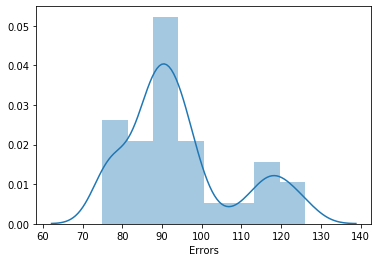

In [172]:
sns.distplot(df_bb['Errors'],bins='auto')
#normally distributed data with outliers

In [173]:
#We can see that most of the data is normally distributed 

# Bivariate Analysis

In [174]:
#Wins is the target variable taken for the project
#Checking for relationship between different attributes

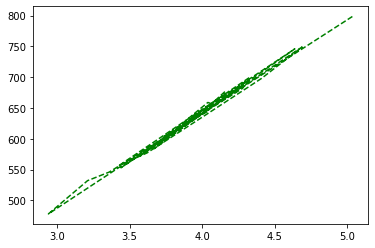

In [175]:
plt.plot(df_bb['ERA'],df_bb['EarnedRuns'],"--g")
#Highly correlated

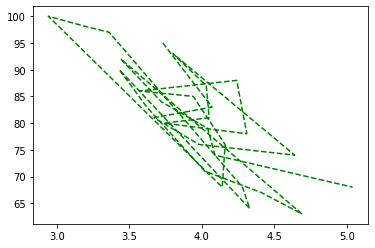

In [176]:
plt.plot(df_bb['ERA'],df_bb['Wins'],"--g")

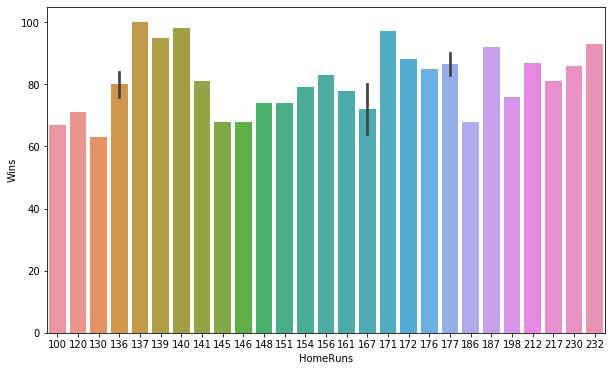

In [177]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['HomeRuns'],df_bb['Wins'])
plt.show()
#Increase in HomeRuns doesnot necessarily mean increase in Wins

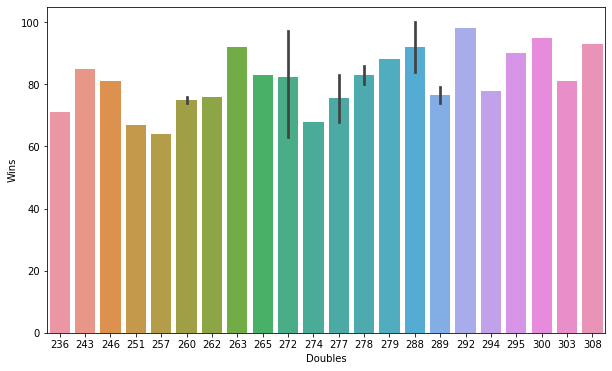

In [178]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['Doubles'],df_bb['Wins'])
plt.show()
#High Value in HomeRuns doesnot necessarily mean increase in Wins

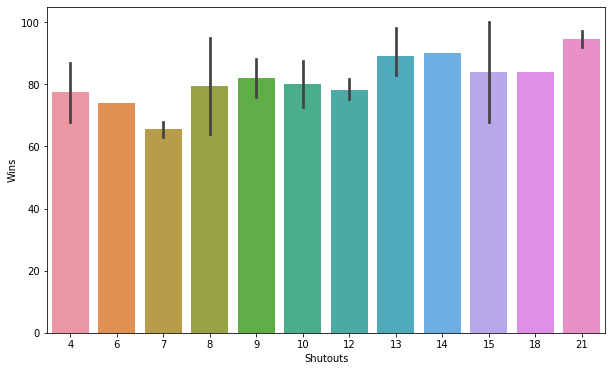

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['Shutouts'],df_bb['Wins'])
plt.show()
#Increase in Shutouts increases Wins

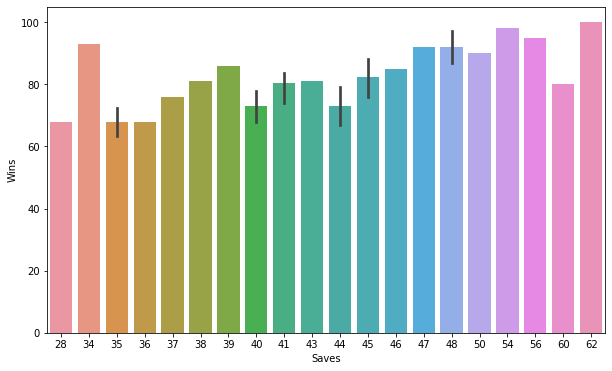

In [180]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['Saves'],df_bb['Wins'])
plt.show()
#Increase in Saves in most cases resulting in increase in Wins

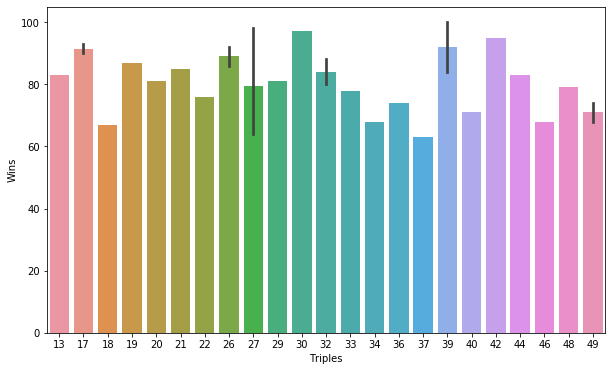

In [181]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['Triples'],df_bb['Wins'])
plt.show()
#High value in Triples doesnot necessarily mean increase in Wins

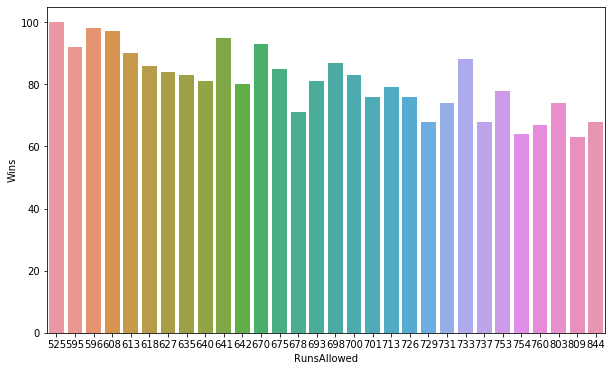

In [182]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['RunsAllowed'],df_bb['Wins'])
plt.show()
#Increase in RunsAllowed results in decrease in Wins

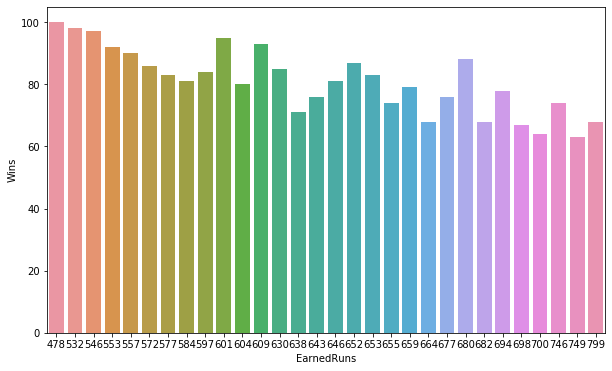

In [183]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['EarnedRuns'],df_bb['Wins'])
plt.show()
#Increase in EarnedRuns results in decrease in Wins

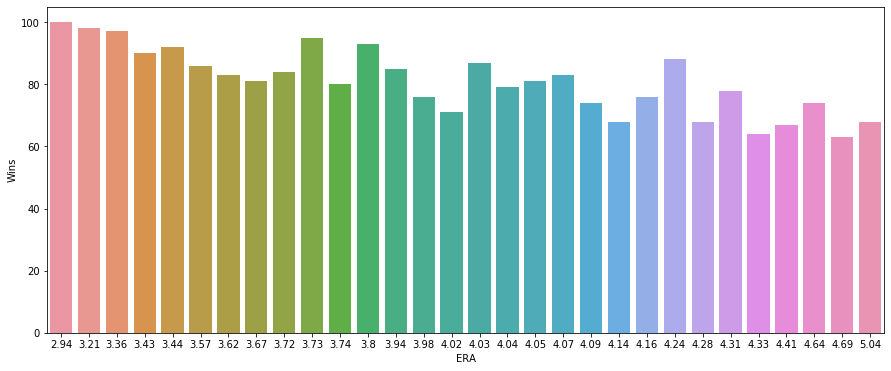

In [184]:
plt.figure(figsize=(15,6))
sns.barplot(df_bb['ERA'],df_bb['Wins'])
plt.show()
#Increase in ERA results in decrease in Wins

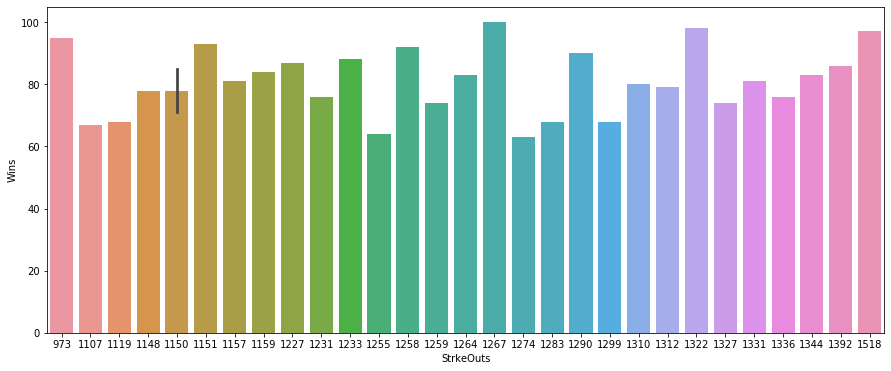

In [185]:
plt.figure(figsize=(15,6))
sns.barplot(df_bb['StrkeOuts'],df_bb['Wins'])
plt.show()

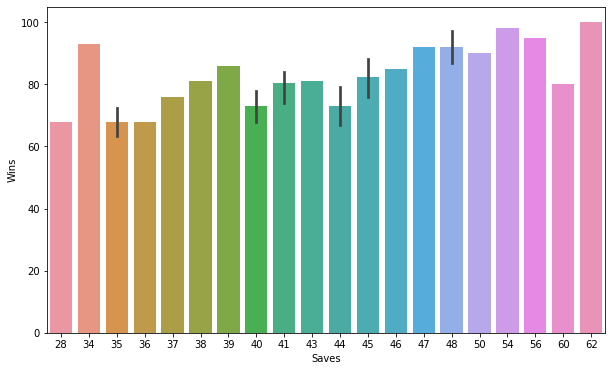

In [186]:
plt.figure(figsize=(10,6))
sns.barplot(df_bb['Saves'],df_bb['Wins'])
plt.show()
#Increase in Saves results in increase in Wins

In [187]:
#Checking the correlation between the attributes
df_bb.corr()

,Wins,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,StrkeOuts,StolenBases,RunsAllowed,EarnedRuns,ERA,CG,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AtBats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HomeRuns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
StrkeOuts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
StolenBases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


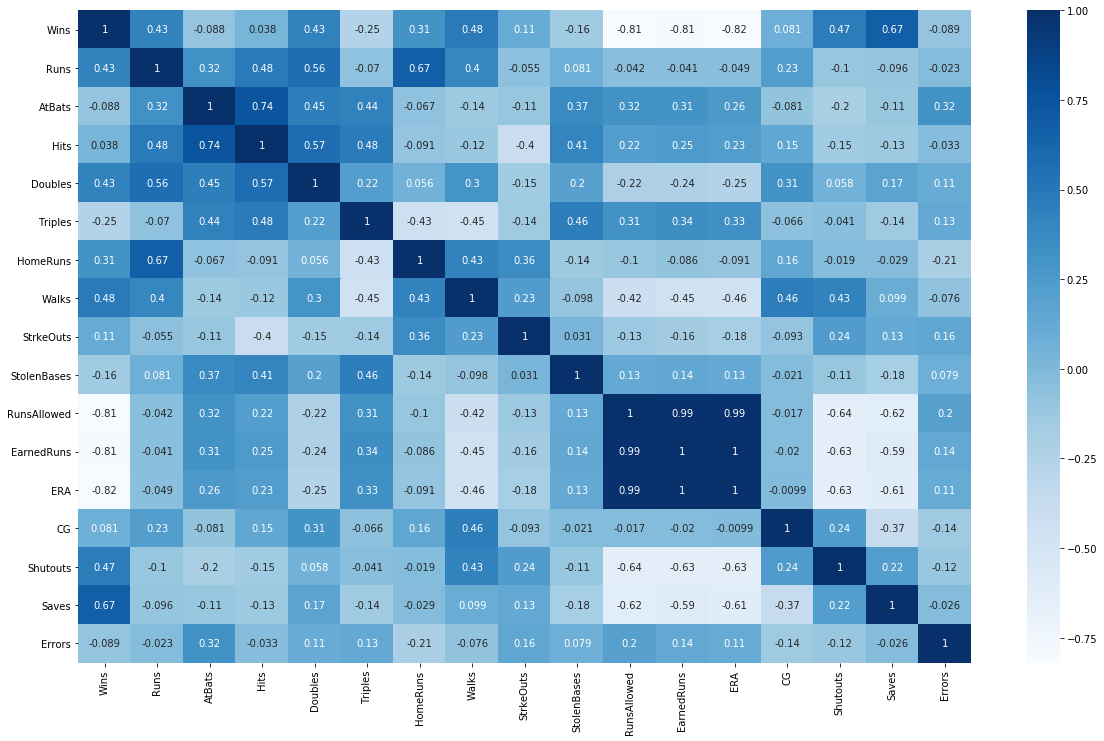

In [188]:
plt.figure(figsize=(20,12))
sns.heatmap(df_bb.corr(),cmap='Blues',annot=True)
plt.show()

# Multivariate Analysis

<Figure size 720x432 with 0 Axes>

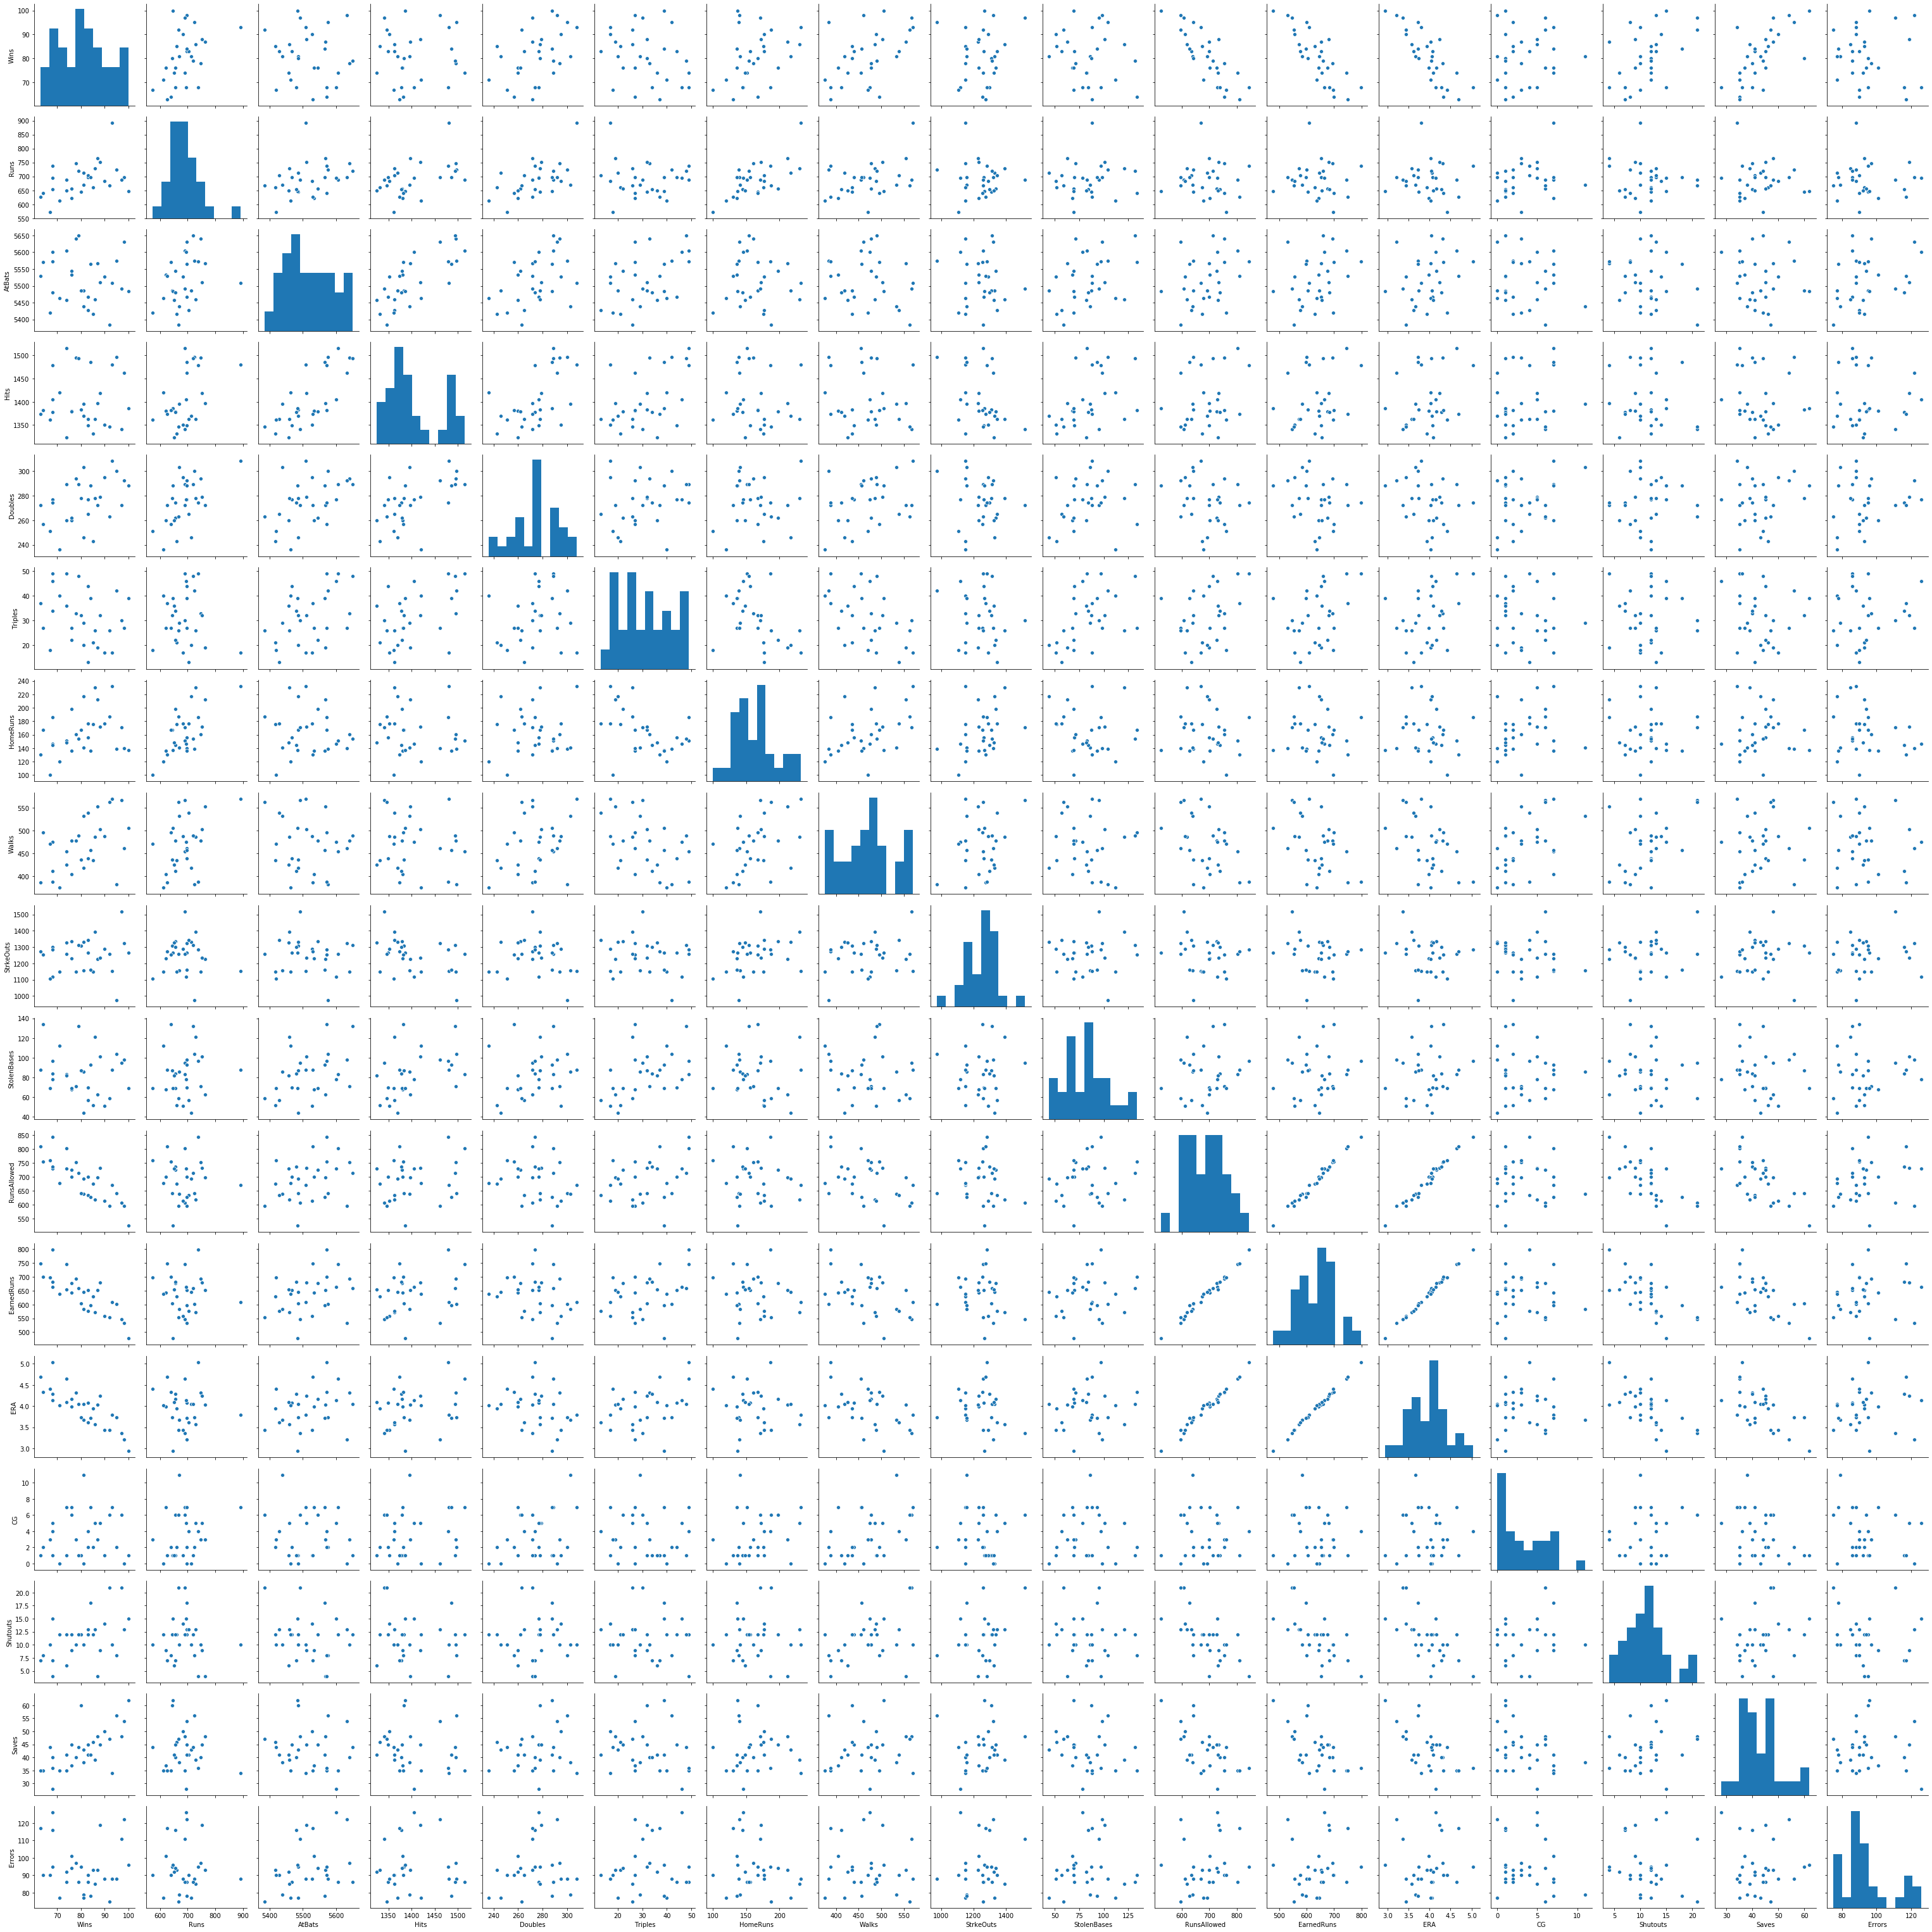

In [123]:
plt.figure(figsize=(10,6))
sns.pairplot(df_bb)
plt.tight_layout()
plt.show()

In [189]:
#Since ERA,EarnedRuns and RunsAllowed has high negative correlation with Wins and
#we drop the columns
df_bb.drop(["ERA",'Hits','AtBats','Errors',"CG"],inplace=True,axis=1) 

In [190]:
#Cheking the skewness of data
df_bb.skew()
# From below ouput, we can say Runs,Hits,CG,Saves,Errors have high skewness

Wins           0.047089
Runs           1.200786
Doubles       -0.230650
Triples        0.129502
HomeRuns       0.516441
Walks          0.158498
StrkeOuts     -0.156065
StolenBases    0.479893
RunsAllowed    0.045734
EarnedRuns     0.058710
Shutouts       0.565790
Saves          0.657524
dtype: float64

In [191]:
#removing skewness using log transform
for col in df_bb.columns:
    if df_bb.skew().loc[col]>0.55:
        df_bb[col]=np.log1p(df_bb[col])

In [192]:
df_bb.skew()
#skewness is reduced

Wins           0.047089
Runs           0.744813
Doubles       -0.230650
Triples        0.129502
HomeRuns       0.516441
Walks          0.158498
StrkeOuts     -0.156065
StolenBases    0.479893
RunsAllowed    0.045734
EarnedRuns     0.058710
Shutouts      -0.589640
Saves          0.163057
dtype: float64

In [193]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_bb))
print(zscore)
print(np.where(zscore>3))
df_bb_new=df_bb[(zscore<3).all(axis=1)]

[[1.3654086  0.66532946 1.42017307 1.04119304 0.7872986  1.53490242
  2.69762957 0.91388329 0.66623393 0.50511008 0.72910756 1.58127344]
 [0.1978383  0.17956168 0.12740339 1.23580856 0.24396668 0.5365919
  0.15487844 0.60182558 0.16597077 0.24892985 0.32263825 0.336185  ]
 [0.00324325 0.30770406 1.58879521 0.22380785 0.7233772  1.13914361
  0.89398189 0.11144918 0.68033909 0.75162313 0.15516048 0.62244106]
 [0.48324437 1.20472969 0.82812203 0.41842337 0.8831807  1.16053598
  0.16860185 0.69098493 0.18007593 0.10392217 0.42776132 0.77328196]
 [0.67783942 0.05507026 0.80189192 1.72234737 0.40377019 0.25136033
  0.10586628 0.02228984 1.61880269 1.59750126 0.32263825 1.08725291]
 [1.17081355 3.22198296 1.86983209 1.39150098 2.18504658 1.79874163
  0.95279649 0.20060853 0.25718416 0.38910394 0.15516048 1.25084255]
 [0.5870284  1.3276866  0.1536335  1.19688546 1.54583256 1.51351006
  0.20781158 0.91388329 0.13776044 0.23442908 2.41026205 0.70306792]
 [0.00324325 0.47676732 1.61502532 1.09957

In [194]:
print('Before removing outliers:',df_bb.shape)
print('After removing outliers:',df_bb_new.shape)

Before removing outliers: (30, 12)
After removing outliers: (29, 12)


In [195]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_bb_final=sc.fit_transform(df_bb_new)
df_bb_final=pd.DataFrame(df_bb_final,columns=df_bb_new.columns)

In [196]:
df_bb_final

,Wins,Runs,Doubles,Triples,HomeRuns,Walks,StrkeOuts,StolenBases,RunsAllowed,EarnedRuns,Shutouts,Saves
0,1.416025,0.952719,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.722413,1.554812
1,0.239947,0.356659,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.312085,0.296229
2,0.043934,-0.241239,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.157879,-0.672787
3,-0.446099,-1.341932,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,-0.426009,-0.825263
4,-0.642112,0.203902,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,0.312085,-1.142637
5,0.631973,1.765462,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,-2.375997,0.667088
6,0.043934,0.721344,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,-0.157879,0.035297
7,-0.054073,-0.816734,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,0.312085,1.952930
8,-0.250086,1.445583,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,-0.157879,-0.379227
9,0.729980,1.506078,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,-0.426009,0.296229


In [197]:
#separating into input and output variables
x=df_bb_final.drop(columns=['Wins'])
y=pd.DataFrame(df_bb_final['Wins'])

In [198]:
#checking the shape
x.shape

(29, 11)

In [199]:
y.shape

(29, 1)

In [200]:
x.skew()
#skewness is reduced further

Runs          -0.388428
Doubles       -0.335304
Triples        0.090124
HomeRuns       0.450862
Walks          0.151193
StrkeOuts     -0.233815
StolenBases    0.494966
RunsAllowed    0.018155
EarnedRuns     0.018461
Shutouts      -0.598073
Saves          0.109983
dtype: float64

In [202]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
    final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)    
    return final_r_state

In [204]:
#Using LinearRegression and checking maxr2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.8071435972055758
r2 score corresponding to 43 is 0.3617185831826869
r2 score corresponding to 44 is 0.6722698870807352
r2 score corresponding to 45 is 0.13297388534412835
r2 score corresponding to 46 is 0.7973354788427212
r2 score corresponding to 47 is 0.9277491385962708
r2 score corresponding to 48 is 0.4706795999472362
r2 score corresponding to 49 is 0.2675490617816212
r2 score corresponding to 50 is 0.808711358545283
r2 score corresponding to 51 is 0.5638027049214704
r2 score corresponding to 52 is 0.3167554692097474
r2 score corresponding to 53 is 0.709962985415183
r2 score corresponding to 54 is 0.4632688527948595
r2 score corresponding to 55 is 0.6295629820634048
r2 score corresponding to 56 is 0.598704578957124
r2 score corresponding to 57 is 0.8142658157469183
r2 score corresponding to 58 is 0.6987779988626518
r2 score corresponding to 59 is 0.5501301339503086
r2 score corresponding to 60 is 0.4388871563150044
r2 score corresponding to 61 is 0

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,26)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 10}

In [206]:
#using KNN regression and checking max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=10)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.5333044982698962
r2 score corresponding to 43 is 0.57452159650082
r2 score corresponding to 44 is 0.7325666666666666
r2 score corresponding to 45 is 0.45052346570397117
r2 score corresponding to 46 is 0.7345637277295569
r2 score corresponding to 47 is 0.5739788732394366
r2 score corresponding to 48 is 0.5706275033377839
r2 score corresponding to 49 is -0.9933596271064897
r2 score corresponding to 50 is 0.16435314685314673
r2 score corresponding to 51 is 0.6294070351758794
r2 score corresponding to 52 is 0.4460490137477586
r2 score corresponding to 53 is 0.5527221350078493
r2 score corresponding to 54 is 0.7579181494661922
r2 score corresponding to 55 is 0.5505582985187998
r2 score corresponding to 56 is 0.4500759946356726
r2 score corresponding to 57 is 0.5714657210401892
r2 score corresponding to 58 is 0.38155583437892093
r2 score corresponding to 59 is 0.3612259740259741
r2 score corresponding to 60 is 0.5216585921915075
r2 score corresponding to 61 

In [207]:
#checking the mean r2 score of both Linear Regression Model and KNN Regression
from sklearn.model_selection import cross_val_score
print('Mean r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression: 0.4061992083963394
Standard Deviation in r2 score for Linear Regression: 0.6279524379695888

Mean r2 score for KNN Regression: 0.055805543220989275
Standard Deviation in r2 score for KNN Regression: 0.7190036740075267


In [208]:
#Checking lasso Regression and finding best value for alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.1}

In [209]:
#Checking max r2 score when we use Lasso
lsreg=Lasso(alpha=0.1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.7777294131725712
r2 score corresponding to 43 is 0.626025271111337
r2 score corresponding to 44 is 0.8950712782497937
r2 score corresponding to 45 is 0.6044784082047545
r2 score corresponding to 46 is 0.9018959682597025
r2 score corresponding to 47 is 0.9212946836741535
r2 score corresponding to 48 is 0.8504454180588129
r2 score corresponding to 49 is 0.38321658506461787
r2 score corresponding to 50 is 0.6301032149400267
r2 score corresponding to 51 is 0.5969036272521588
r2 score corresponding to 52 is 0.5137937710413876
r2 score corresponding to 53 is 0.8367133696415654
r2 score corresponding to 54 is 0.7314863752217768
r2 score corresponding to 55 is 0.7999689479543444
r2 score corresponding to 56 is 0.621452401389457
r2 score corresponding to 57 is 0.8488988337810736
r2 score corresponding to 58 is 0.651074720508585
r2 score corresponding to 59 is 0.6821267281755421
r2 score corresponding to 60 is 0.5620902761469676
r2 score corresponding to 61 is 0

In [210]:
#Using cross val score with lasso
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Lasso Regression:',cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Lasso Regression: 0.4785867557309949
Standard Deviation in r2 score for Lasso Regression: 0.611583464843546


In [211]:
#Checking Ridge regression and finding best value for alpha
from sklearn.linear_model import Ridge
rdreg=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [212]:
#Checking max r2 score when we use Ridge
rdreg=Ridge(alpha=0.001)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.8071450051096403
r2 score corresponding to 43 is 0.3678853492244658
r2 score corresponding to 44 is 0.672678772073237
r2 score corresponding to 45 is 0.13701693510655966
r2 score corresponding to 46 is 0.7974730545259172
r2 score corresponding to 47 is 0.927933363217718
r2 score corresponding to 48 is 0.4723616761301316
r2 score corresponding to 49 is 0.2683540218374857
r2 score corresponding to 50 is 0.8093970767377014
r2 score corresponding to 51 is 0.5640844629051216
r2 score corresponding to 52 is 0.31710616415471415
r2 score corresponding to 53 is 0.7103984679932382
r2 score corresponding to 54 is 0.464010276242094
r2 score corresponding to 55 is 0.629572653677443
r2 score corresponding to 56 is 0.5986301805960756
r2 score corresponding to 57 is 0.8141556170969129
r2 score corresponding to 58 is 0.698902633857208
r2 score corresponding to 59 is 0.5499328659467915
r2 score corresponding to 60 is 0.4388781179557233
r2 score corresponding to 61 is 0.

In [213]:
#Using cross val score with Ridge
print("Mean r2 score for Ridge Regression:",cross_val_score(rdreg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ridge Regression:',cross_val_score(rdreg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ridge Regression: 0.40856739793978925
Standard Deviation in r2 score for Ridge Regression: 0.6296468570107394


In [214]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 100}

In [215]:
#Using cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=100)
print("Mean r2 score for Gradient Boosting Regression:",cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Gradient Boosting Regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient Boosting Regression: -0.3374752158333339
Standard Deviation in r2 score for Gradient Boosting Regression: 0.35568553690959076


In [76]:
#Using Ada Boost regression algorithm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'learning_rate': 0.001,
 'n_estimators': 10}

In [83]:
ada_reg=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.001,n_estimators=10)
print("Mean r2 score for Ada Boost Regression:",cross_val_score(ada_reg,x,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for Ada Boost Regression:',cross_val_score(ada_reg,x,y,cv=5,scoring='r2').std())

Mean r2 score for Ada Boost Regression: 0.3729365704142345
Standard Deviation in r2 score for Ada Boost Regression: 0.81068722465505


In [84]:
#checking maximum r2 score corresponding to Ada Boost
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to 42 is 0.6517240749111
r2 score corresponding to 43 is 0.20046146957329936
r2 score corresponding to 44 is 0.7537137499919419
r2 score corresponding to 45 is 0.17355784861073398
r2 score corresponding to 46 is 0.6992357215932765
r2 score corresponding to 47 is 0.7750806780240105
r2 score corresponding to 48 is 0.43280291493031453
r2 score corresponding to 49 is -1.0850584001625547
r2 score corresponding to 50 is 0.14544541844262682
r2 score corresponding to 51 is 0.4287388250969877
r2 score corresponding to 52 is 0.37581619374251896
r2 score corresponding to 53 is 0.759831760017561
r2 score corresponding to 54 is 0.15177011771994509
r2 score corresponding to 55 is 0.19578918665435807
r2 score corresponding to 56 is 0.3085620548545921
r2 score corresponding to 57 is 0.775648431616651
r2 score corresponding to 58 is 0.7097722174741856
r2 score corresponding to 59 is 0.5877383908150784
r2 score corresponding to 60 is 0.49991453989781576
r2 score corresponding to 6

In [216]:
#We tried all methods and till now Linear Regression is the best option 
#Random state corresponding to highest r2 score is 69
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=69,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [217]:
#Finding RMSE and r2 score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score is:",r2_score(y_test,y_pred))

RMSE is: 0.1782736903879464
r2 score is: 0.9788690563309725


In [218]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(lreg,"Project2_Baseball.pkl")

['Project2_Baseball.pkl']